In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def alpha(V):
    return 0.01 * (V + 55) / (1 - np.exp(-0.1 * (V + 55)))

def beta(V):
    return 0.125 * np.exp(-0.0125 * (V + 65))

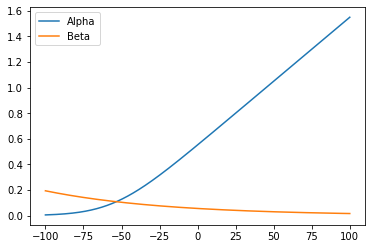

In [4]:
v = np.linspace(-100, 100, 1000)
plt.plot(v, alpha(v), label='Alpha')
plt.plot(v, beta(v), label='Beta')
plt.legend()

In [89]:
E_K = -77

g_K = -0.36

def potassium_transition(gates, V, dt):
v
    a = alpha(V)*dt # probability of opening
    b = beta(V)*dt # probability of closing
    
    a_rand_transition = np.random.rand(gates.shape[0], 4) < a
    b_rand_transition = np.random.rand(gates.shape[0], 4) < b
    new_gates = np.where(gates==0, a_rand_transition, 1 - b_rand_transition) # gates that were closed might open and vice versa
    return new_gates

In [7]:
E_K = -77

g_K = -0.36

def sodium_transition(gates, V, dt):
    
    alpha = lambda V :  0.1 * (V + 40) / (1 - np.exp(-0.1 * (V + 40)))
    beta = lambda V: 4 * np.exp(-0.0556 * (V + 65))
    a = alpha(V)*dt # probability of opening
    b = beta(V)*dt # probability of closing
    
    a_rand_transition = np.random.rand(gates.shape[0], 4) < a
    b_rand_transition = np.random.rand(gates.shape[0], 4) < b
    new_gates = np.where(gates==0, a_rand_transition, 1 - b_rand_transition) # gates that were closed might open and vice versa
    return new_gates

In [96]:
T = 40 # 40 ms, like in Figure 5.12
dt = 0.01 # 0.1 ms dT

t = np.arange(0, T, dt)
L = len(t)

v = -100 + ((t > 10) & (t < 30)) * 110

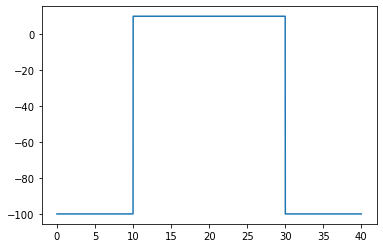

In [97]:
plt.plot(t,v)

In [98]:

N_channels = 100


gate_current = np.zeros((N_channels, L))
channels_open = np.zeros((N_channels, L))

gates = np.zeros((N_channels,4)) # start with all the gates closed
for i in range(L):
    gates = transition(gates, v[i], dt)
    channels_open[:,i] = np.sum(gates,axis=1) == 4 # a channel is open if all 4 gates are open
    gate_current[:,i] = channels_open[:,i] * g_K * (v[i] - E_K)
    

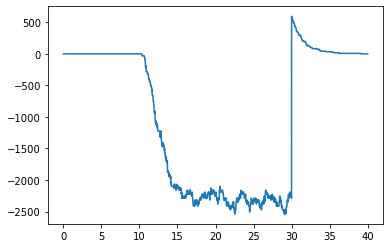

In [100]:
plt.plot(t, np.sum(gate_current, axis=0));